In [1]:
import sys
import pickle
from os import path
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(path.join('2015_core', 'train_set.csv'))
y_train =df.iloc[:, 1:2]
x_train = df.iloc[:, 2:]

In [3]:
# PCA decompisition
n_components = 400
pca = PCA(n_components=n_components)
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

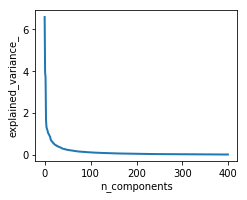

In [4]:
# PCA plot
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

In [5]:
print(pca.explained_variance_)

[6.58201267e+00 3.92034092e+00 3.68197379e+00 1.63903934e+00
 1.31228008e+00 1.23123083e+00 1.17114123e+00 1.07376970e+00
 1.00500351e+00 9.76564555e-01 9.24265993e-01 8.84265009e-01
 8.45242629e-01 7.29966904e-01 6.80299912e-01 6.53585044e-01
 6.32263048e-01 6.02593539e-01 5.61699666e-01 5.51703460e-01
 5.31307123e-01 4.94440044e-01 4.76748560e-01 4.69374298e-01
 4.48274943e-01 4.38257831e-01 4.35679250e-01 4.05906003e-01
 4.01156172e-01 3.94586529e-01 3.74236804e-01 3.69319948e-01
 3.58172523e-01 3.49785217e-01 3.41028551e-01 3.33066697e-01
 3.23138849e-01 3.05880384e-01 2.94358463e-01 2.85901957e-01
 2.78840783e-01 2.75608532e-01 2.69797763e-01 2.67291052e-01
 2.61803216e-01 2.51516714e-01 2.39747824e-01 2.37689147e-01
 2.34246091e-01 2.32598009e-01 2.22398395e-01 2.18978841e-01
 2.15641787e-01 2.11108848e-01 2.07623977e-01 2.02293655e-01
 1.98876745e-01 1.96251929e-01 1.95063186e-01 1.90501896e-01
 1.86952659e-01 1.82036763e-01 1.79505270e-01 1.75747811e-01
 1.75151991e-01 1.683919

In [31]:
x_pca = PCA(n_components=100).fit_transform(x_train)
y_train = y_train.values.flatten().tolist()
print(x_pca)
print(y_train)

[[ 1.22082258e+00  7.40584303e-01 -1.87216398e+00 ...  1.34198027e-01
  -2.48644949e-01  1.33572401e-01]
 [-1.26302784e+00  4.81877875e-01 -1.30050788e+00 ... -1.85844987e-02
  -2.16579190e-01  1.87131579e-01]
 [-9.50101959e-02  1.01852151e+00 -1.33602114e+00 ... -1.29758252e-03
   6.16459860e-02  1.82171447e-01]
 ...
 [ 1.01681657e+00  5.43460913e-01  2.21376297e-01 ...  4.42334007e-01
  -2.48510295e-01 -1.15379421e-01]
 [ 1.97677508e+00  7.05305596e-01  3.51785464e+00 ... -1.31268161e-01
   2.64418101e-01  1.57293560e-01]
 [ 1.83653740e+00  9.97654573e-01 -3.41607904e+00 ... -5.96121879e-02
  -7.94794211e-02  1.59707673e+00]]
[0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, -1, -1, -1, -1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, 1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 0, 0, -1, -1, 0, 0, -1, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
clf = svm.SVC(decision_function_shape='ovr')
print('Strat training muti-class svm classifier...')
clf.fit(x_pca, y_train)
print("Training is done.")
svm_model = path.join('2015_core','model', 'svm.model')
print("Saving model to {}...".format(svm_model))
with open(svm_model, 'wb') as f:
    pickle.dump(clf, f)
print("Saving model done.")
#print('demo for svm....')
#demo_x = [[0],[1],[2],[3],[4],[5]]
#demo_y = [-1,0,1,0,1,-1]
#clf = svm.SVC(decision_function_shape='ovo')
#clf.fit(demo_x, demo_y)
#dec = clf.decision_function([[1]])
#print(dec.shape[1])

Training is done.
Saving model to 2015_core\model\svm.model...
Saving model done.


In [35]:
print('Test training accuracy: %2f' % clf.score(x_pca, y_train))

Test training accuracy: 0.638537


In [40]:
two_y = [0 if y == -1 else y for y in y_train]
two_clf = svm.SVC(C = 2, probability=True)
print('Strat training 2-class svm classifier...')
two_clf.fit(x_pca, two_y)
print("Training is done.")
svm_model = path.join('2015_core','model', 'svm_two.model')
print("Saving model to {}...".format(svm_model))
with open(svm_model, 'wb') as f:
    pickle.dump(two_clf, f)
print("Saving model done.")
print('Test training accuracy: %2f' % two_clf.score(x_pca, two_y))

Strat training 2-class svm classifier...
Training is done.
Saving model to 2015_core\model\svm_two.model...
Saving model done.
Test training accuracy: 0.784136
